# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
# %pip install --upgrade plotly

In [4]:
# %pip install seaborn

### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.any().isna

<bound method Series.isna of Unnamed: 0.1      True
Unnamed: 0        True
Organisation      True
Location          True
Date              True
Detail            True
Rocket_Status     True
Price             True
Mission_Status    True
dtype: bool>

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [13]:
df_data = df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [14]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

## Descriptive Statistics

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [16]:
df_data.describe()

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [17]:
df_data["Organisation"].value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

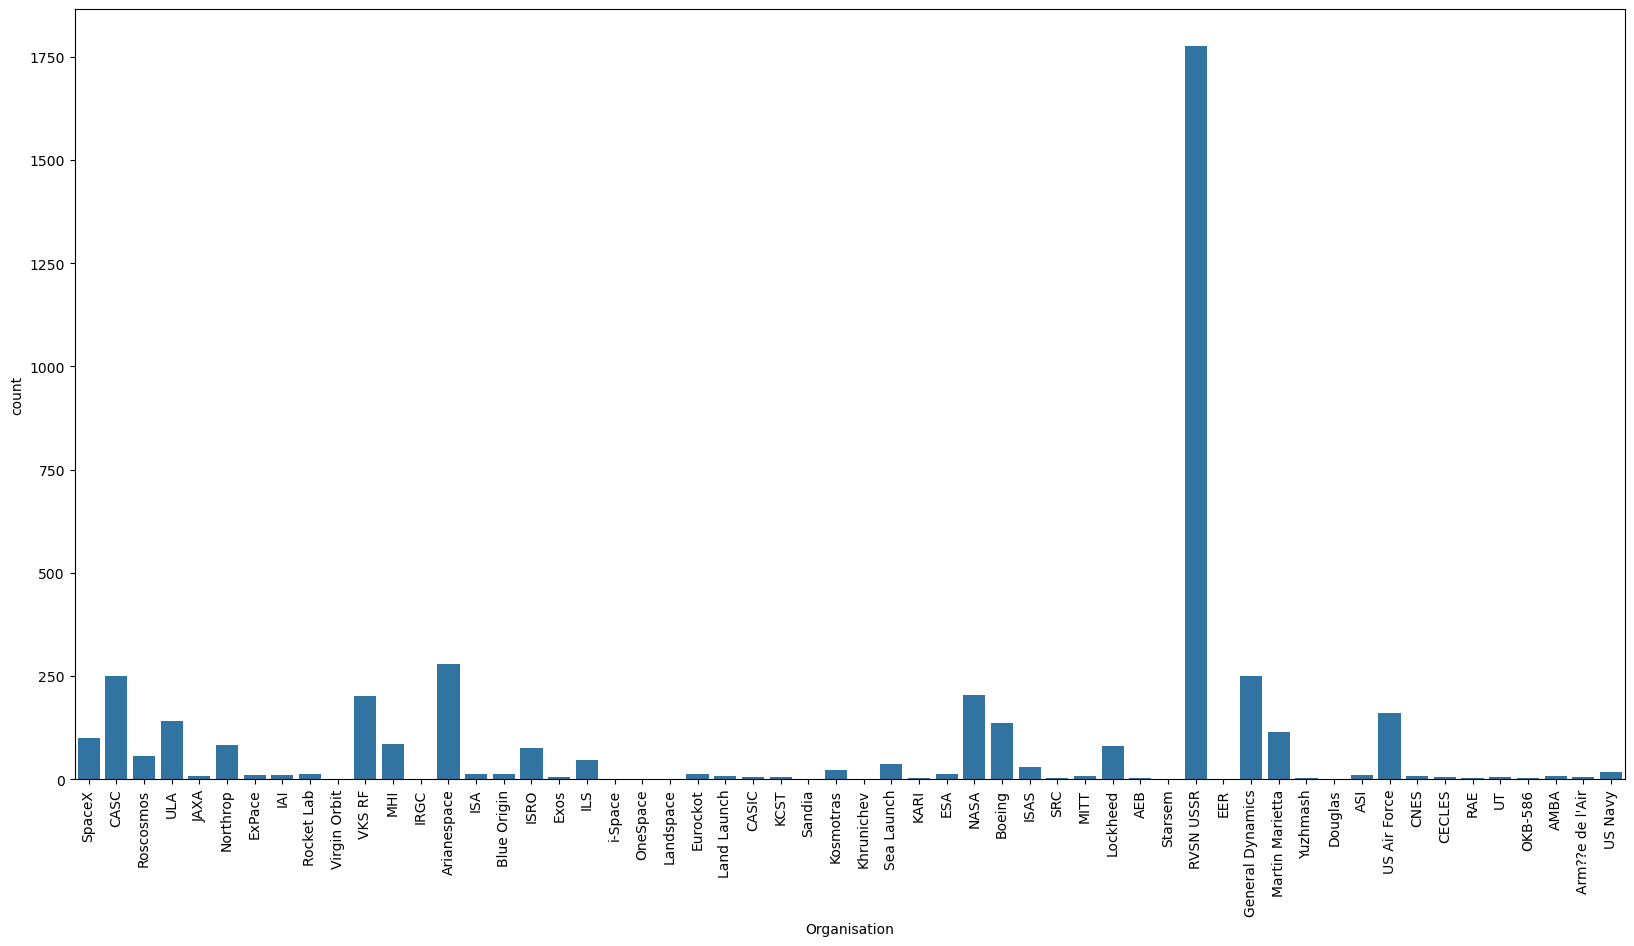

In [18]:
# plot the number of launches per organisation
plt.figure(figsize=(20, 10))
sns.countplot(x="Organisation", data=df_data)
plt.xticks(rotation=90)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
df_data.groupby("Rocket_Status")["Rocket_Status"].count()

Rocket_Status
StatusActive      790
StatusRetired    3534
Name: Rocket_Status, dtype: int64

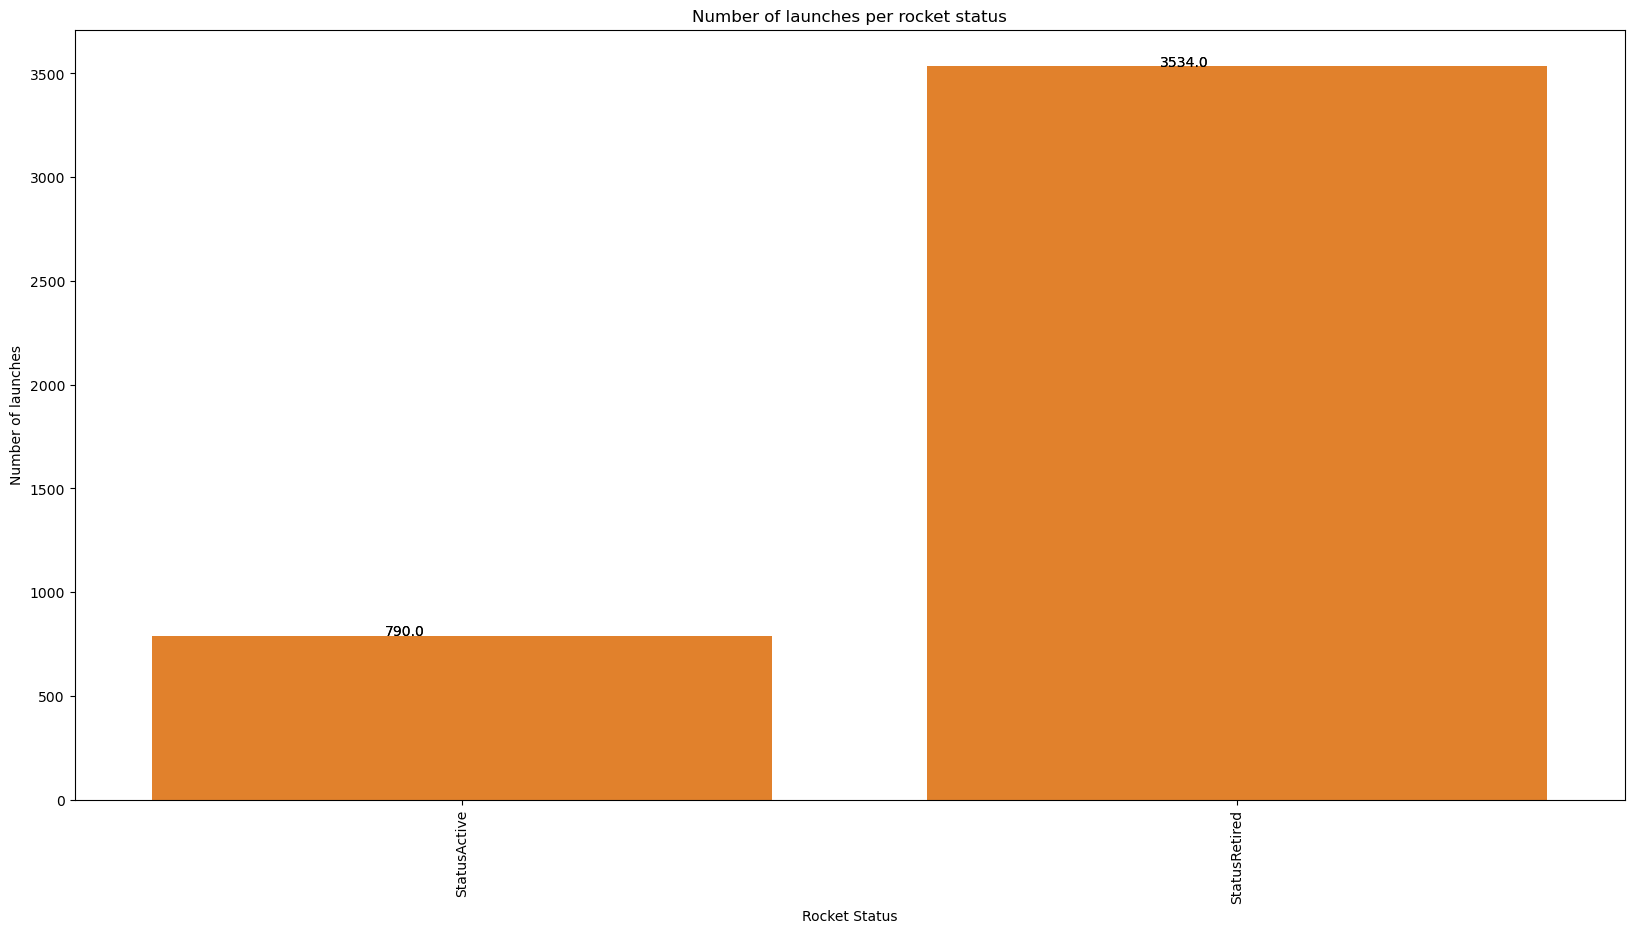

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Rocket_Status", data=df_data)
plt.xticks(rotation=90)
# labels
plt.xlabel("Rocket Status")
plt.ylabel("Number of launches")
# title
plt.title("Number of launches per rocket status")
# count on top of each bar using seaborn
ax = sns.countplot(x="Rocket_Status", data=df_data) 
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+1), fontsize=10, color='black')

plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
df_data.groupby("Mission_Status")["Mission_Status"].count()

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Mission_Status, dtype: int64

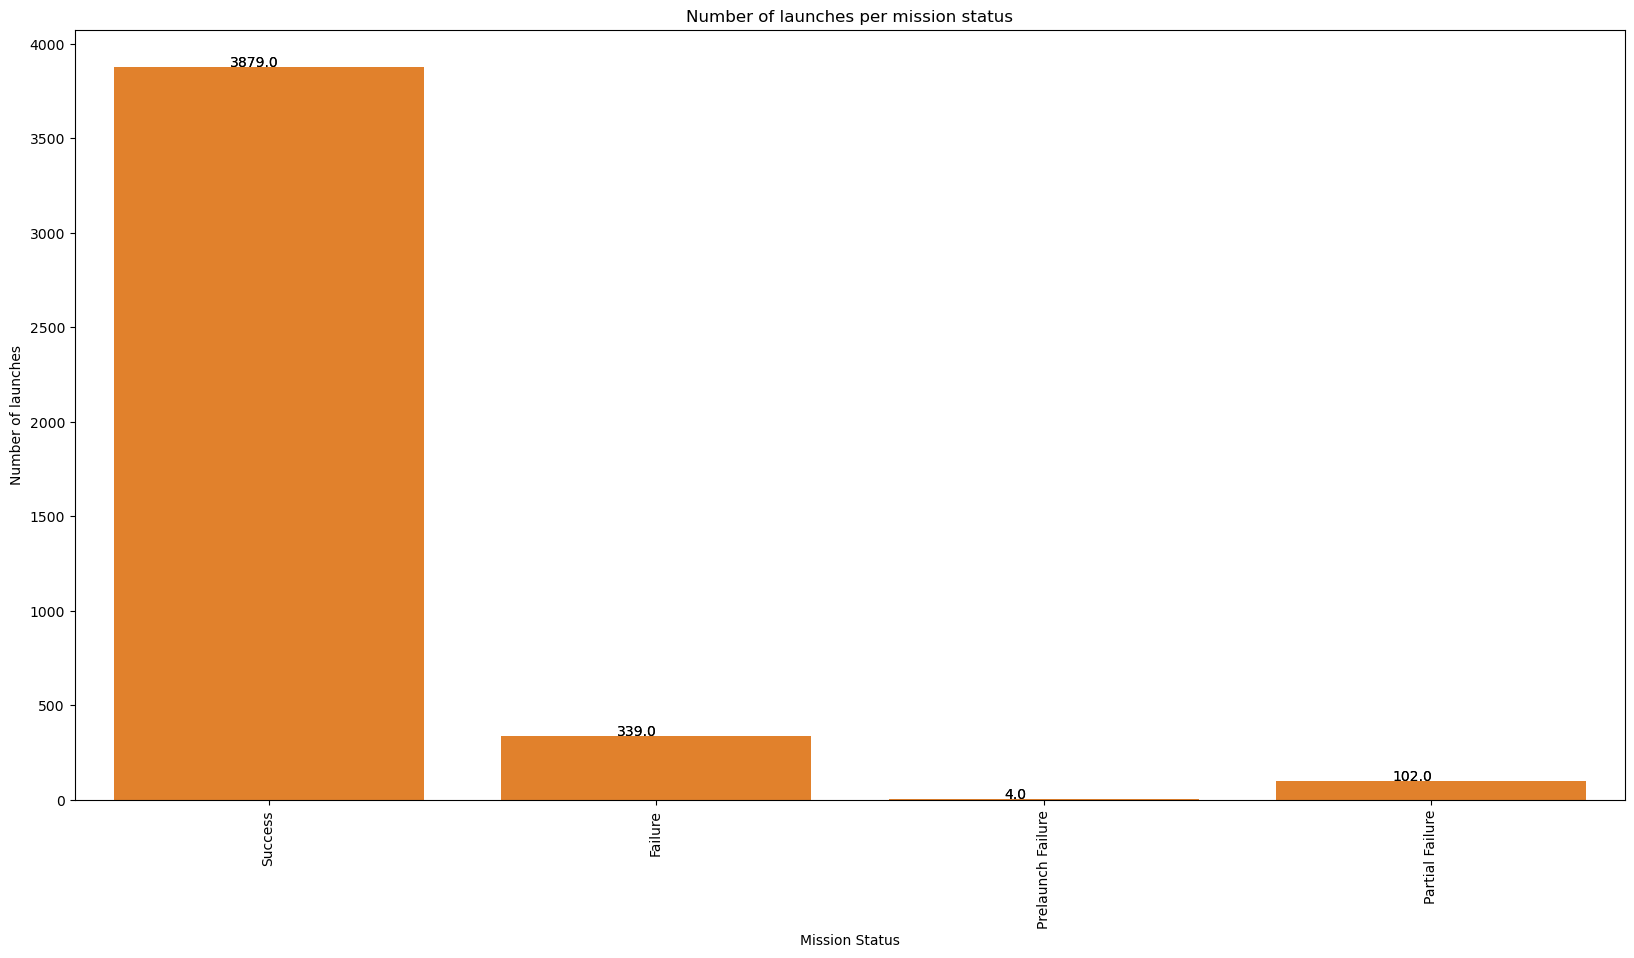

In [22]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Mission_Status", data=df_data)
plt.xticks(rotation=90)
# labels
plt.xlabel("Mission Status")
plt.ylabel("Number of launches")
# title
plt.title("Number of launches per mission status")
# count on top of each bar using seaborn
ax = sns.countplot(x="Mission_Status", data=df_data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+1), fontsize=10, color='black')

plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [23]:
cost_data = df_data[df_data["Price"].isna() == False]

In [24]:
cost_data["Price"] = cost_data["Price"].apply(lambda x: int(x.replace(",", "").split(".")[0]))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6748\1845482347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data["Price"] = cost_data["Price"].apply(lambda x: int(x.replace(",", "").split(".")[0]))


In [25]:
cost_data["Price"].info()

<class 'pandas.core.series.Series'>
Index: 964 entries, 0 to 4020
Series name: Price
Non-Null Count  Dtype
--------------  -----
964 non-null    int64
dtypes: int64(1)
memory usage: 15.1 KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6748\4106428586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cost_data["Price"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6748\4106428586.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(cost_data["Price"])


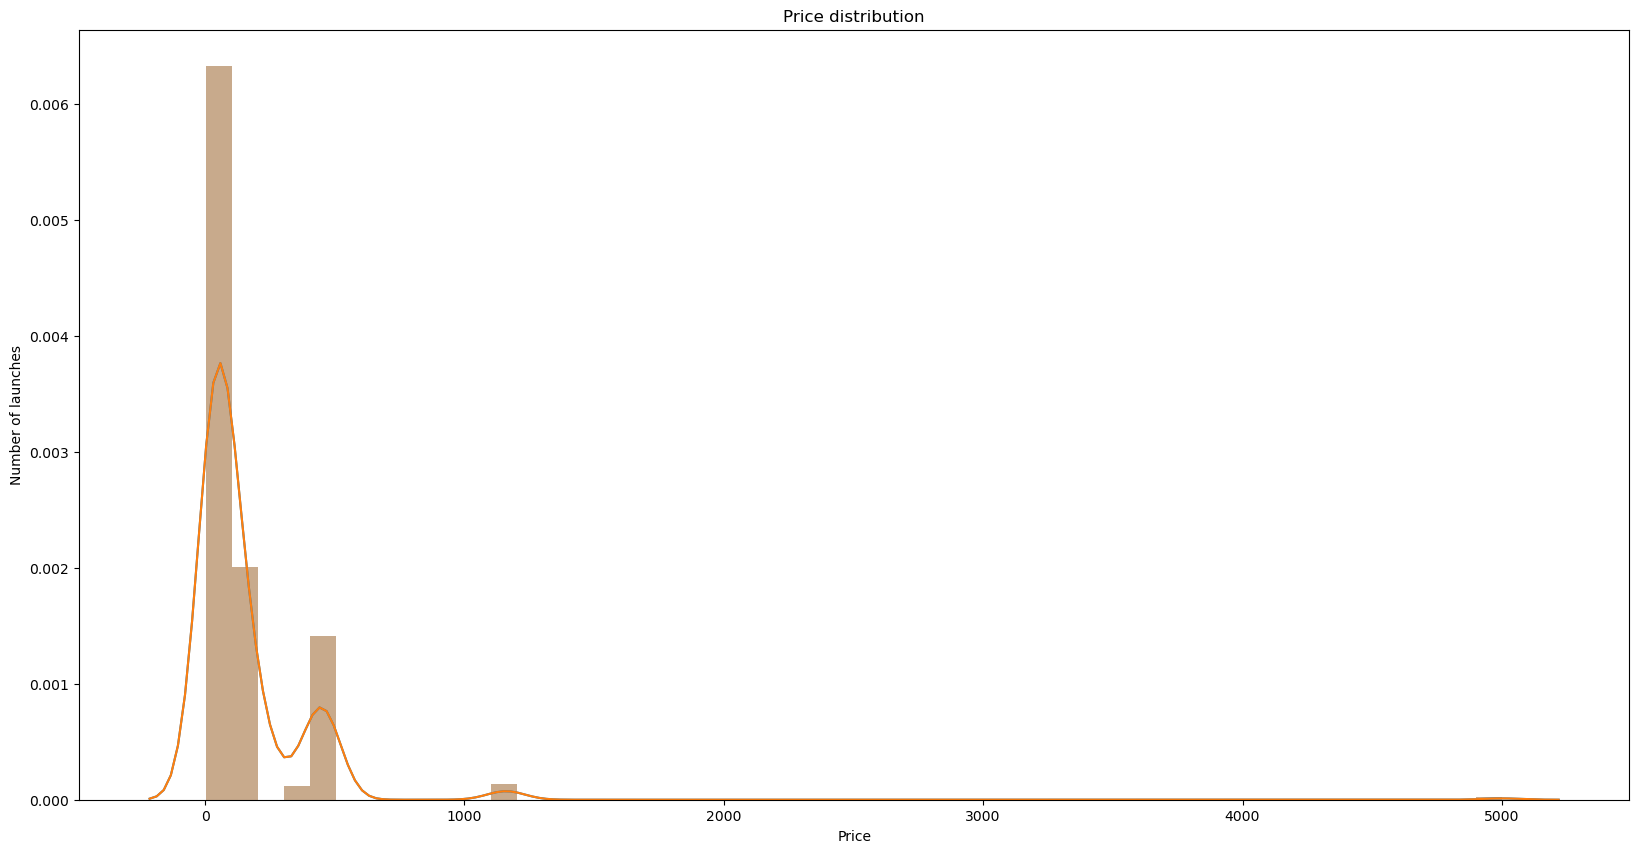

In [26]:
# create a histogram of the price column
plt.figure(figsize=(20, 10))
sns.distplot(cost_data["Price"])
# labels
plt.xlabel("Price in USD (millions)")
plt.ylabel("Number of launches")
# title
plt.title("Price distribution")
# count on top of each bar using seaborn
ax = sns.distplot(cost_data["Price"])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+1), fontsize=10, color='black')

plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [27]:
# create a Choropleth map of the number of launches per country
df_data["Country"] = df_data["Location"].apply(lambda x: x.split(", ")[-1])

In [28]:
df_data["Country"].value_counts()

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: count, dtype: int64

In [29]:
# changes in the country names
df_data["Country"] = df_data["Country"].replace("Russia", "Russian Federation")
df_data["Country"] = df_data["Country"].replace("New Mexico", "United States")
df_data["Country"] = df_data["Country"].replace("Yellow Sea", "China")
df_data["Country"] = df_data["Country"].replace("Shahrud Missile Test Site", "Iran")
df_data["Country"] = df_data["Country"].replace("Iran", "Iran, Islamic Republic of")
df_data["Country"] = df_data["Country"].replace("Pacific Missile Range Facility", "United States")
df_data["Country"] = df_data["Country"].replace("Barents Sea", "Russian Federation")
df_data["Country"] = df_data["Country"].replace("Gran Canaria", "United States")
df_data["Country"] = df_data["Country"].replace("United States", "USA")
df_data["Country"] = df_data["Country"].replace("North Korea", "Korea, Democratic People's Republic of")
df_data["Country"] = df_data["Country"].replace("Pacific Ocean", "Australia")
df_data["Country"] = df_data["Country"].replace("South Korea", "Korea, Republic of")

In [30]:
for c in countries:
    print(c.name, c.alpha2)

Afghanistan AF
Åland Islands AX
Albania AL
Algeria DZ
American Samoa AS
Andorra AD
Angola AO
Anguilla AI
Antarctica AQ
Antigua and Barbuda AG
Argentina AR
Armenia AM
Aruba AW
Australia AU
Austria AT
Azerbaijan AZ
Bahamas BS
Bahrain BH
Bangladesh BD
Barbados BB
Belarus BY
Belgium BE
Belize BZ
Benin BJ
Bermuda BM
Bhutan BT
Bolivia, Plurinational State of BO
Bonaire, Sint Eustatius and Saba BQ
Bosnia and Herzegovina BA
Botswana BW
Bouvet Island BV
Brazil BR
British Indian Ocean Territory IO
Brunei Darussalam BN
Bulgaria BG
Burkina Faso BF
Burundi BI
Cambodia KH
Cameroon CM
Canada CA
Cabo Verde CV
Cayman Islands KY
Central African Republic CF
Chad TD
Chile CL
China CN
Christmas Island CX
Cocos (Keeling) Islands CC
Colombia CO
Comoros KM
Congo CG
Congo, Democratic Republic of the CD
Cook Islands CK
Costa Rica CR
Côte d'Ivoire CI
Croatia HR
Cuba CU
Curaçao CW
Cyprus CY
Czechia CZ
Denmark DK
Djibouti DJ
Dominica DM
Dominican Republic DO
Ecuador EC
Egypt EG
El Salvador SV
Equatorial Guinea GQ


In [31]:
# convert the country names to their ISO3 code
df_data["Country"] = df_data["Country"].apply(lambda x: countries.get(x).alpha3)

In [32]:
%pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [33]:
df_data["Country"].value_counts()

Country
RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
AUS      42
IRN      14
NZL      13
ISR      11
KEN       9
PRK       5
KOR       3
BRA       3
Name: count, dtype: int64

In [34]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country  
0  StatusActive   50.0        Success     USA  
1  StatusActive  29.75        Success     CHN  
2  StatusActive    NaN        Success     USA  
3  StatusActive   65.0        Success     KAZ  
4  StatusActive  145.0        Success     USA

In [35]:
launcehs_per_country = df_data.groupby("Country")["Country"].count().reset_index(name="Launch count")
launcehs_per_country

Country  Launch count
0      AUS            42
1      BRA             3
2      CHN           269
3      FRA           303
4      IND            76
5      IRN            14
6      ISR            11
7      JPN           126
8      KAZ           701
9      KEN             9
10     KOR             3
11     NZL            13
12     PRK             5
13     RUS          1398
14     USA          1351

In [36]:
fig = px.choropleth(launcehs_per_country,
                    locations="Country",
                    color="Launch count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
# title
fig.update_layout(title_text="Number of launches per country")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [37]:
failure_per_country = df_data[df_data["Mission_Status"] == "Failure"].groupby("Country")["Country"].count().reset_index(name="Failure_count")
failure_per_country

Country  Failure_count
0      AUS              6
1      BRA              2
2      CHN             19
3      FRA             13
4      IND              8
5      IRN              8
6      ISR              2
7      JPN             10
8      KAZ             72
9      KOR              2
10     NZL              2
11     PRK              3
12     RUS             63
13     USA            129

In [38]:
fig = px.choropleth(failure_per_country,
                    locations="Country",
                    color="Failure_count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
# title
fig.update_layout(title_text="Number of failures per country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [39]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country  
0  StatusActive   50.0        Success     USA  
1  StatusActive  29.75        Success     CHN  
2  StatusActive    NaN        Success     USA  
3  StatusActive   65.0        Success     KAZ  
4  StatusActive  145.0        Success     USA

In [40]:
# dataframe for Sunburst chart
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    title='Sunburst Chart of Countries, Organizations, and Mission Status',
)

In [41]:
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [42]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
 7   Country         4324 non-null   object
dtypes: object(8)
memory usage: 270.4+ KB


In [43]:
df_data["Price"] = df_data["Price"].apply(lambda x: int(x.replace(",", "").split(".")[0]) if pd.notnull(x) else x)


In [44]:
cost_per_org = df_data.groupby("Organisation")["Price"].sum().reset_index(name="Total cost").sort_values(ascending=False, by="Total cost")

In [45]:
cost_per_org.head()

Organisation  Total cost
35         NASA   76,280.00
3   Arianespace   16,344.00
48          ULA   14,798.00
40    RVSN USSR   10,000.00
7          CASC    6,243.00

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6748\3537259945.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




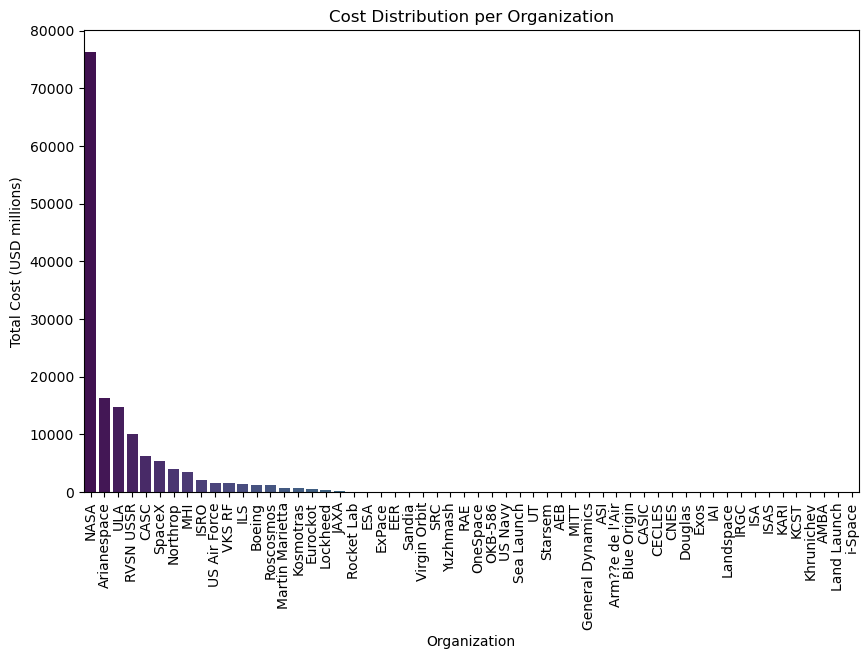

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Organisation', y='Total cost', data=cost_per_org, palette='viridis')
plt.title('Cost Distribution per Organization')
plt.xlabel('Organization')
plt.xticks(rotation=90)
plt.ylabel('Total Cost (USD millions)')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [47]:
#  we need to group the data by organisation and mission status and then find the avg cost per launch for each organisation
cost_per_org_status = df_data.groupby(["Organisation", "Mission_Status"])["Price"].mean().reset_index(name="Avg cost per launch").sort_values(ascending=False, by="Avg cost per launch")
cost_per_org_status

Organisation   Mission_Status  Avg cost per launch
87     RVSN USSR          Success             5,000.00
75          NASA  Partial Failure             1,160.00
76          NASA          Success               508.36
74          NASA          Failure               450.00
13        Boeing  Partial Failure               350.00
..           ...              ...                  ...
110      US Navy          Success                  NaN
111           UT          Failure                  NaN
112           UT          Success                  NaN
117     Yuzhmash          Success                  NaN
118      i-Space          Success                  NaN

[119 rows x 3 columns]

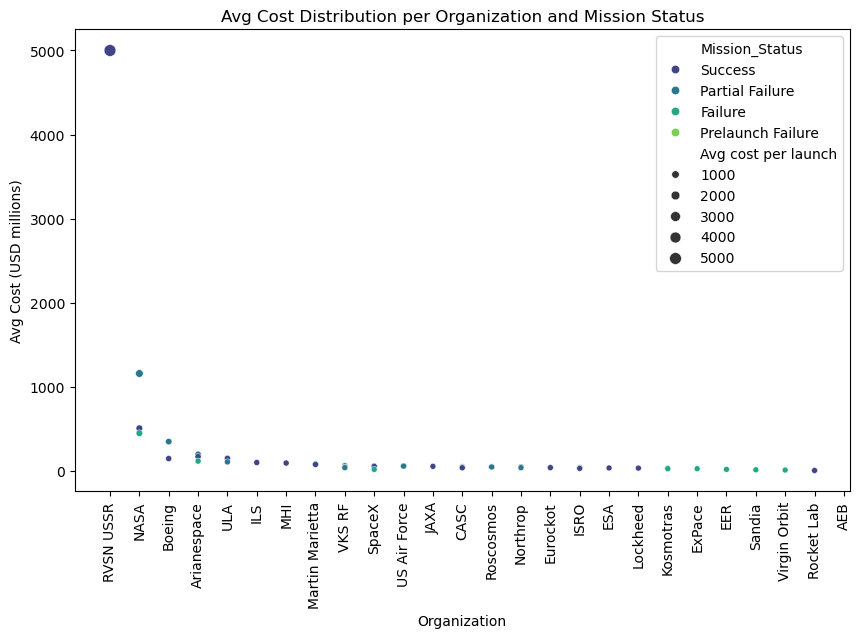

In [48]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Organisation', 
                y='Avg cost per launch', 
                hue='Mission_Status', 
                data=cost_per_org_status, 
                palette='viridis',
                size="Avg cost per launch")
plt.title('Avg Cost Distribution per Organization and Mission Status')
plt.xlabel('Organization')
plt.xticks(rotation=90)
plt.ylabel('Avg Cost (USD millions)')

plt.show()

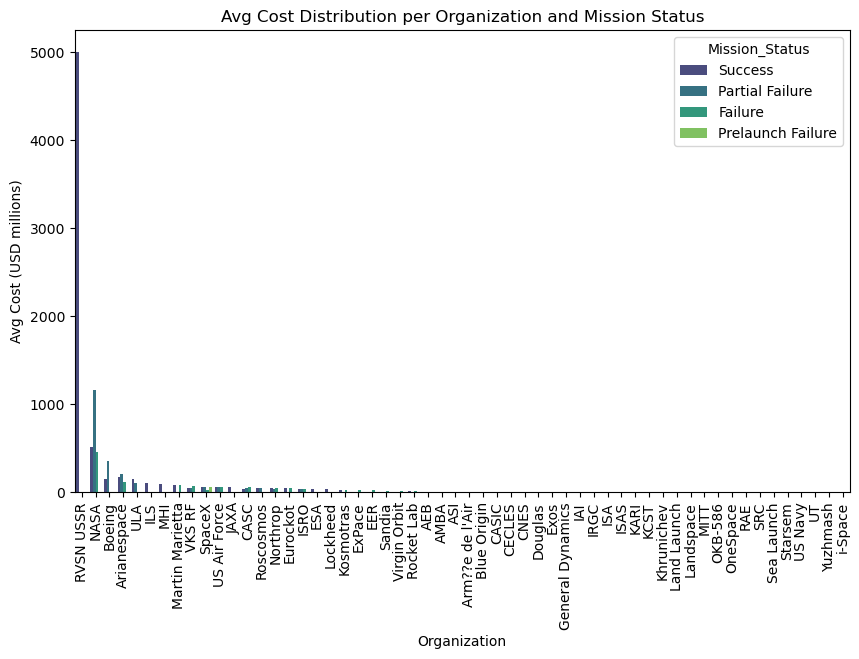

In [49]:
plt.figure(figsize=(10, 6))

# bar plot
sns.barplot(x='Organisation', 
            y='Avg cost per launch', 
            hue='Mission_Status', 
            data=cost_per_org_status, 
            palette='viridis')
plt.title('Avg Cost Distribution per Organization and Mission Status')
plt.xlabel('Organization')
plt.xticks(rotation=90)
plt.ylabel('Avg Cost (USD millions)')
plt.show()



# Chart the Number of Launches per Year

In [50]:
df_data["Year"] = df_data["Date"].apply(lambda x: x.split(", ")[-1].split(" ")[0]).astype(int)

In [51]:
launch_per_year = df_data.groupby("Year")["Year"].count().reset_index(name="Launch count").sort_values(ascending=False, by="Launch count")
launch_per_year

Year  Launch count
14  1971           119
61  2018           117
20  1977           114
19  1976           113
18  1975           113
..   ...           ...
53  2010            37
48  2005            37
1   1958            28
2   1959            20
0   1957             3

[64 rows x 2 columns]

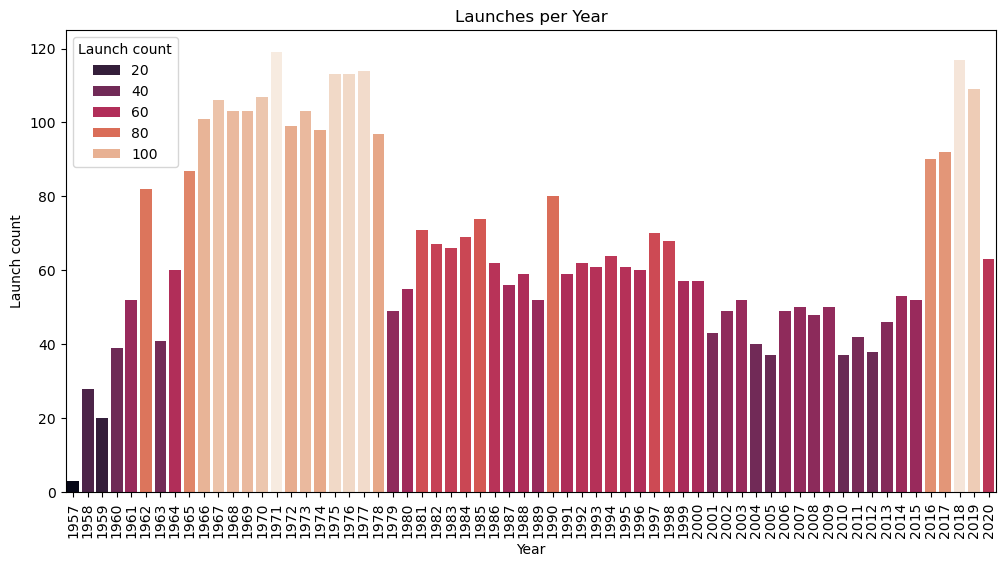

In [52]:
plt.figure(figsize=(12, 6))

# bar plot 
sns.barplot(x='Year',
            y='Launch count',
            data=launch_per_year,
            palette='rocket',
            hue='Launch count')

# title and labels
plt.title('Launches per Year')
plt.xlabel('Year')
plt.ylabel('Launch count')
plt.xticks(rotation=90)
plt.show()




# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [53]:
df_data["Month"] = df_data["Date"].apply(lambda x: x.split(" ")[1])

In [54]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country  Year Month  
0  StatusActive  50.00        Success     USA  2020   Aug  
1  StatusActive  29.00        Success     CHN  2020   Aug  
2  StatusActive    NaN        Success     USA  2020   Aug  
3  StatusActive  65.00        Success     KAZ  2020   Jul  
4  StatusActive 145.00        Success     USA  2020   Jul

In [55]:
# Group by month and count the number of launches
launch_per_month = df_data.groupby("Month")["Month"].count().reset_index(name="Launch count").sort_values(ascending=False, by="Launch count")

# finding month with max launches
max_launch_month = launch_per_month.loc[launch_per_month["Launch count"].idxmax()]["Month"]
print("Month with max launches: ", max_launch_month)

Month with max launches:  Dec


In [56]:
launch_per_month.head()

Month  Launch count
2    Dec           450
6    Jun           402
0    Apr           383
10   Oct           381
1    Aug           373

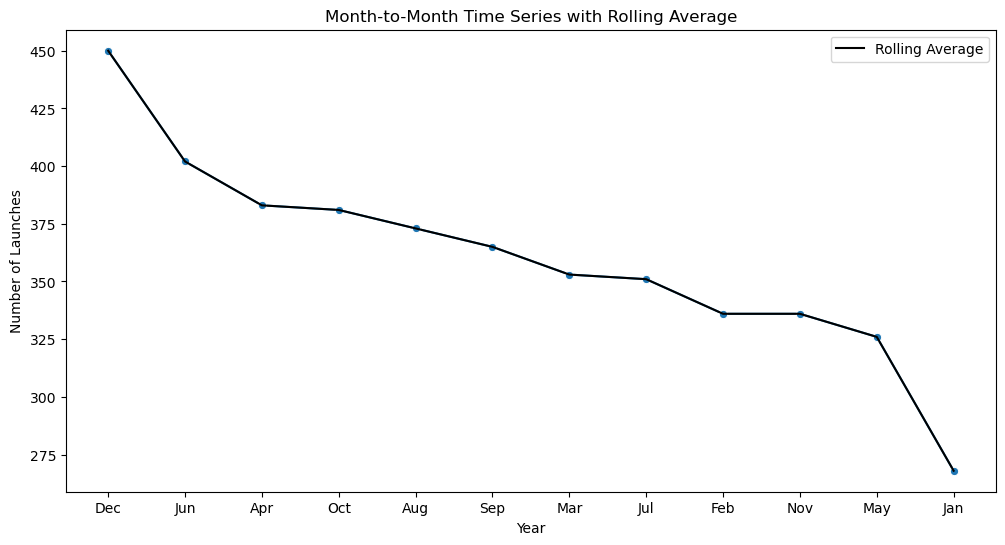

In [57]:
# month-to-month time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Launch count', data=launch_per_month, marker='o')

# Add a rolling average
rolling_average = launch_per_month.groupby('Month')['Launch count'].rolling(window=3, min_periods=1).mean().reset_index()
sns.lineplot(x='Month', y='Launch count', data=rolling_average, color='black', label='Rolling Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Month-to-Month Time Series with Rolling Average')
plt.legend()

# Show the plot
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [58]:
print("Month with max launches: ", max_launch_month)
print("Month with min launches: ", launch_per_month.loc[launch_per_month["Launch count"].idxmin()]["Month"])

Month with max launches:  Dec
Month with min launches:  Jan


In [59]:
best_year = launch_per_year.loc[launch_per_year["Launch count"].idxmax()]["Year"]
print("Best year: ", best_year, "with", launch_per_year.loc[launch_per_year["Launch count"].idxmax()]["Launch count"], "launches")

Best year:  1971 with 119 launches


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [60]:
# average cost per launch per year
avg_cost_per_year = df_data.groupby("Year")["Price"].mean().reset_index(name="Avg cost per launch").sort_values(ascending=False, by="Avg cost per launch")
avg_cost_per_year

Year  Avg cost per launch
30  1987             1,686.67
31  1988             1,193.00
16  1973             1,160.00
13  1970             1,160.00
14  1971             1,160.00
..   ...                  ...
19  1976                  NaN
20  1977                  NaN
21  1978                  NaN
22  1979                  NaN
23  1980                  NaN

[64 rows x 2 columns]

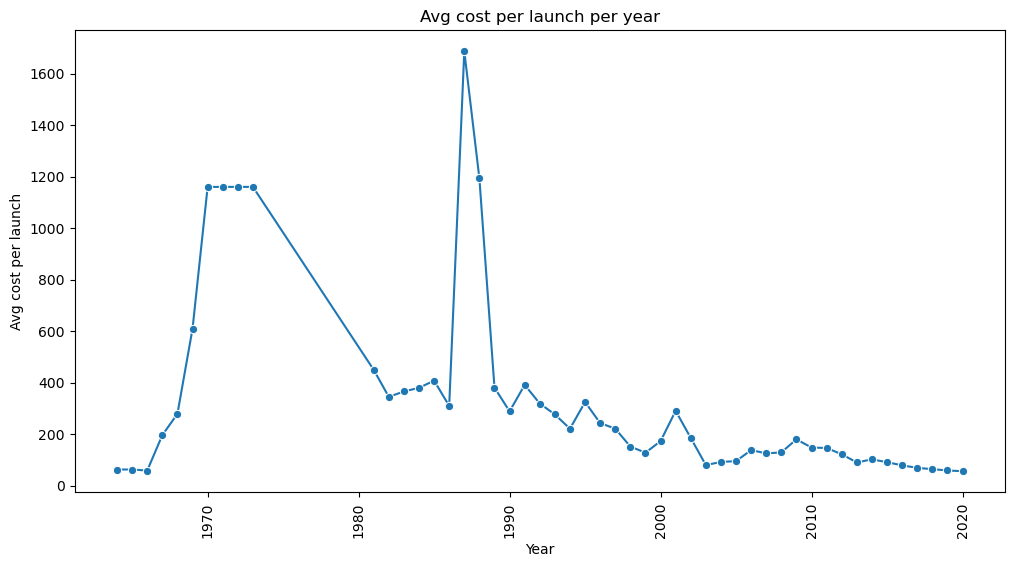

In [61]:
# line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Avg cost per launch', data=avg_cost_per_year, marker='o')
# title and labels
plt.title('Avg cost per launch per year')
plt.xlabel('Year')
plt.ylabel('Avg cost per launch')
plt.xticks(rotation=90)
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [62]:
top_10_org = df_data.groupby("Organisation")["Organisation"].count().reset_index(name="Launch count").sort_values(ascending=False, by="Launch count").head(10)
top_10_org

Organisation  Launch count
40         RVSN USSR          1777
3        Arianespace           279
17  General Dynamics           251
7               CASC           251
35              NASA           203
52            VKS RF           201
49      US Air Force           161
48               ULA           140
6             Boeing           136
34   Martin Marietta           114

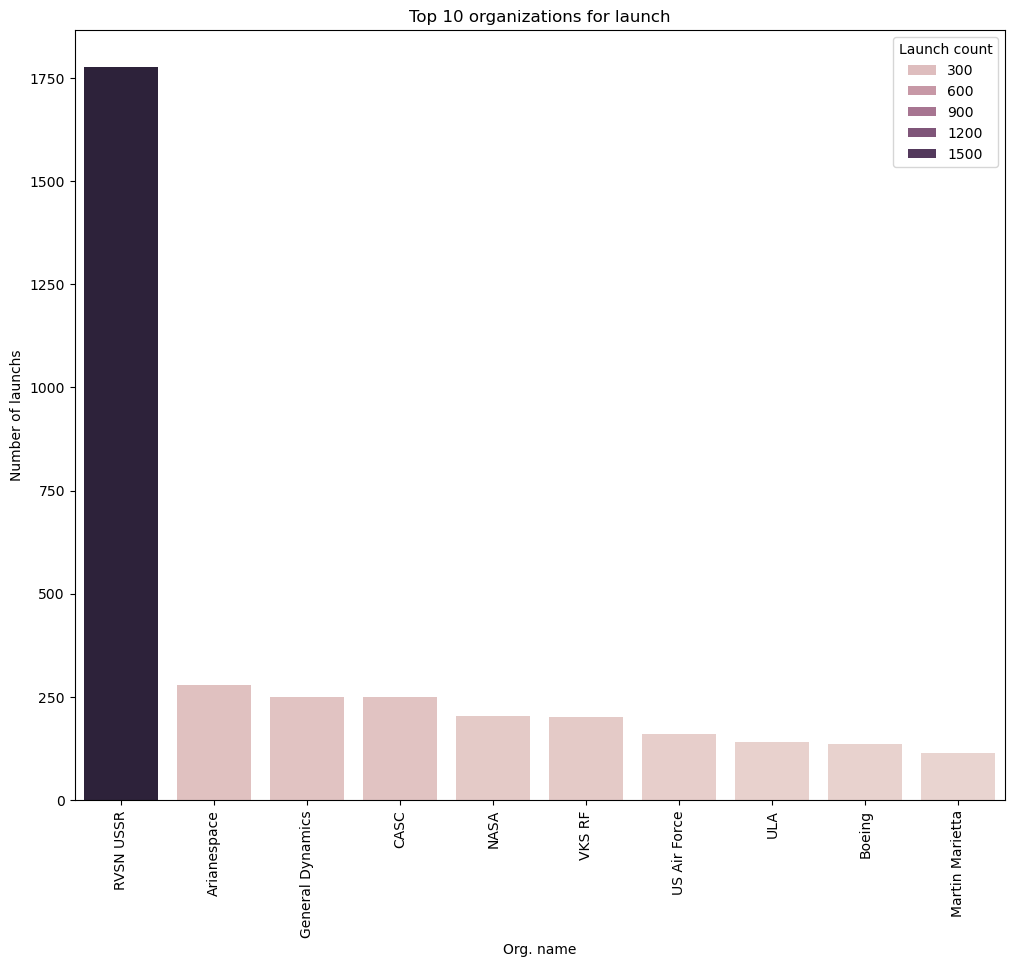

In [63]:
plt.figure(figsize=(12, 10))
# bar plot
sns.barplot(
    x="Organisation",
    y="Launch count",
    data=top_10_org,
    hue="Launch count"
)

# title and labels
plt.title('Top 10 organizations for launch')
plt.xlabel('Org. name')
plt.ylabel('Number of launchs')
plt.xticks(rotation=90)
plt.show()

In [64]:
df_top_10 = df_data[df_data["Organisation"].isin(df_data["Organisation"].value_counts().nlargest(10).index)]

In [65]:
grouped_data = df_top_10.groupby(['Year', 'Organisation']).size().unstack().fillna(0)
grouped_data

Organisation  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
Year                                                                         
1957                 0.00    0.00  0.00              0.00             0.00   
1958                 0.00    0.00  0.00              0.00             0.00   
1959                 0.00    0.00  0.00              1.00             0.00   
1960                 0.00    0.00  0.00              5.00             0.00   
1961                 0.00    0.00  0.00              8.00             0.00   
...                   ...     ...   ...               ...              ...   
2016                11.00    0.00 22.00              0.00             0.00   
2017                11.00    0.00 16.00              0.00             0.00   
2018                11.00    0.00 37.00              0.00             0.00   
2019                 9.00    0.00 27.00              0.00             0.00   
2020                 4.00    0.00 19.00              0.00             0.00   

Organisation  NASA  RVSN USSR   ULA  US Air Force  VKS RF  
Year                                                       
1957          0.00       2.00  0.00          0.00    0.00  
1958          2.00       5.00  0.00          2.00    0.00  
1959          1.00       4.00  0.00         10.00    0.00  
1960          4.00       9.00  0.00         21.00    0.00  
1961         12.00       9.00  0.00         23.00    0.00  
...            ...        ...   ...           ...     ...  
2016          0.00       0.00 12.00          0.00    4.00  
2017          0.00       0.00  8.00          0.00    6.00  
2018          0.00       0.00  8.00          0.00    5.00  
2019          0.00       0.00  5.00          0.00    8.00  
2020          0.00       0.00  4.00          0.00    3.00  

[64 rows x 10 columns]

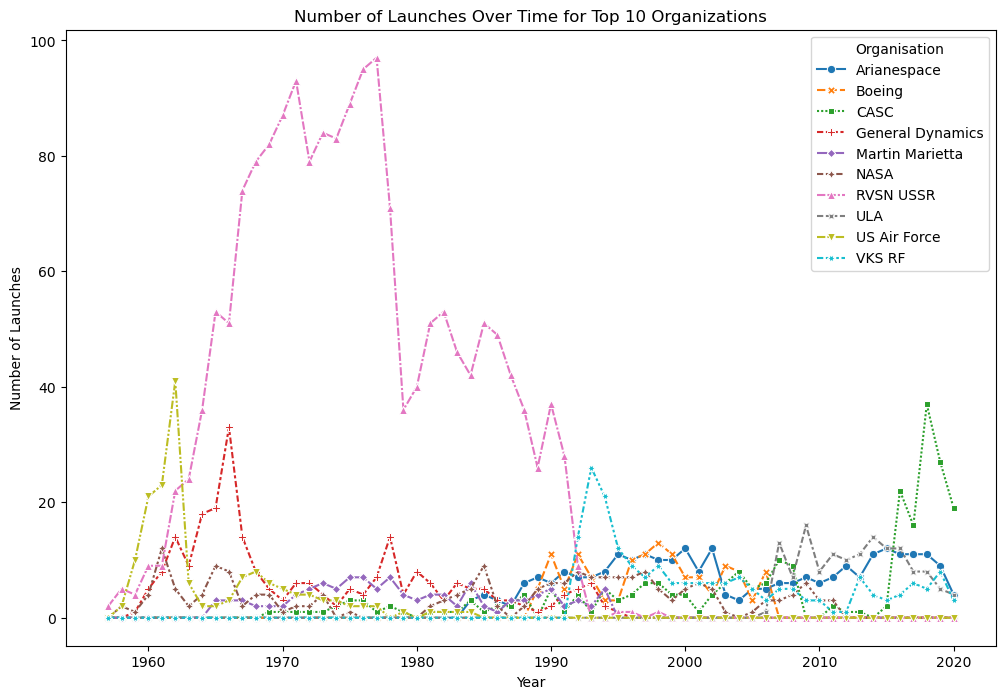

In [66]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, markers=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time for Top 10 Organizations')

# Show the plot
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [67]:
ussr_usa = grouped_data[["US Air Force", "RVSN USSR"]]

In [68]:
# data till yeat 1991
ussr_usa_till_1991 = ussr_usa.loc[ussr_usa.index.get_level_values('Year') <= 1991]
ussr_usa_till_1991

Organisation  US Air Force  RVSN USSR
Year                                 
1957                  0.00       2.00
1958                  2.00       5.00
1959                 10.00       4.00
1960                 21.00       9.00
1961                 23.00       9.00
1962                 41.00      22.00
1963                  6.00      24.00
1964                  2.00      36.00
1965                  2.00      53.00
1966                  3.00      51.00
1967                  7.00      74.00
1968                  8.00      79.00
1969                  6.00      82.00
1970                  5.00      87.00
1971                  4.00      93.00
1972                  4.00      79.00
1973                  3.00      84.00
1974                  3.00      83.00
1975                  2.00      89.00
1976                  2.00      95.00
1977                  2.00      97.00
1978                  0.00      71.00
1979                  1.00      36.00
1980                  0.00      40.00
1981                  1.00      51.00
1982                  1.00      53.00
1983                  1.00      46.00
1984                  1.00      42.00
1985                  0.00      51.00
1986                  0.00      49.00
1987                  0.00      42.00
1988                  0.00      36.00
1989                  0.00      26.00
1990                  0.00      37.00
1991                  0.00      28.00

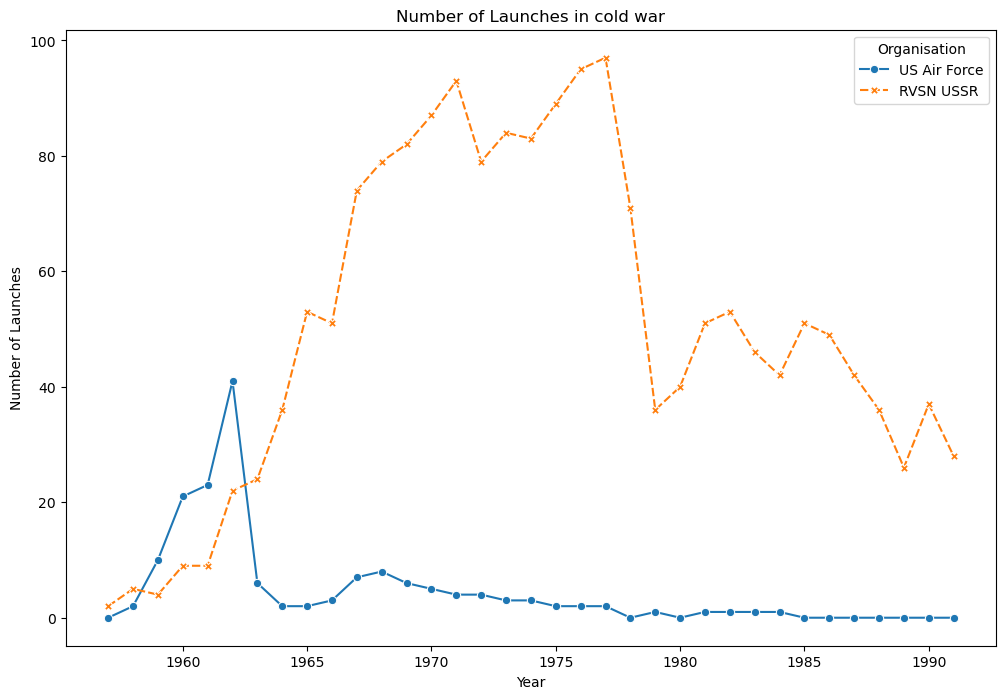

In [69]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=ussr_usa_till_1991, markers=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches in cold war')

# Show the plot
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [70]:
"""
organizations that were significant during the Cold War era and played roles in space exploration:

- NASA (National Aeronautics and Space Administration): United States
- Roscosmos: Russia (formerly part of the Soviet space program)
- VKS RF (Russian Aerospace Forces): Russia
- US Air Force: United States
- RVSN USSR (Strategic Rocket Forces of the Soviet Union): Soviet Union
- Khrunichev: Russia

"""

'\norganizations that were significant during the Cold War era and played roles in space exploration:\n\n- NASA (National Aeronautics and Space Administration): United States\n- Roscosmos: Russia (formerly part of the Soviet space program)\n- VKS RF (Russian Aerospace Forces): Russia\n- US Air Force: United States\n- RVSN USSR (Strategic Rocket Forces of the Soviet Union): Soviet Union\n- Khrunichev: Russia\n\n'

In [71]:
ussr_usa_data = df_data[df_data['Country'].isin(['USA', 'KAZ', 'RUS'])]

ussr_usa_data = ussr_usa_data['Country'].value_counts().reset_index(name='Launch count')


In [72]:
ussr_usa_data

Country  Launch count
0     RUS          1398
1     USA          1351
2     KAZ           701

In [73]:
# ploty pie chart
plt.figure(figsize=(12, 8))
fig = px.pie(ussr_usa_data, values='Launch count', names='Country', title='Launches by Country')
fig.show()

<Figure size 1200x800 with 0 Axes>

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [74]:
df = ussr_usa

In [75]:
# Assuming df is your original DataFrame
df_reset = df.reset_index()

# Melt the DataFrame
melted_df = df_reset.melt(id_vars='Year', var_name='Organization', value_name='Launch Count')

# Display the resulting DataFrame
print(melted_df)

     Year  Organization  Launch Count
0    1957  US Air Force          0.00
1    1958  US Air Force          2.00
2    1959  US Air Force         10.00
3    1960  US Air Force         21.00
4    1961  US Air Force         23.00
..    ...           ...           ...
123  2016     RVSN USSR          0.00
124  2017     RVSN USSR          0.00
125  2018     RVSN USSR          0.00
126  2019     RVSN USSR          0.00
127  2020     RVSN USSR          0.00

[128 rows x 3 columns]


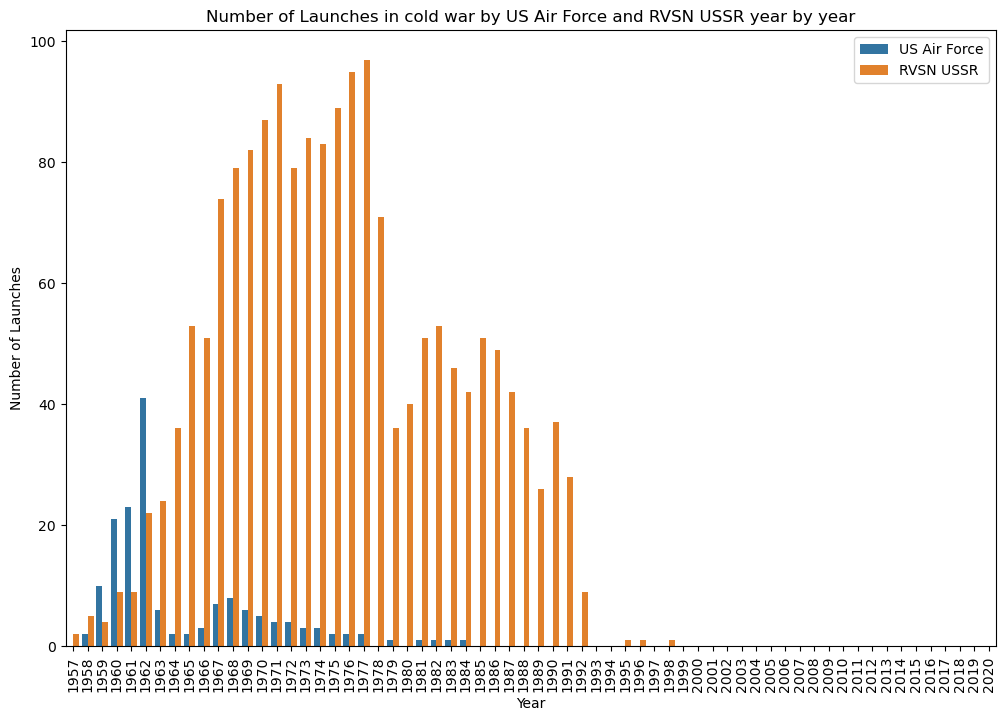

In [76]:
plt.figure(figsize=(12, 8))
# bar plot for ussr and usa
sns.barplot(data=melted_df, 
            x='Year',
            y='Launch Count',
            hue='Organization')


# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches in cold war by US Air Force and RVSN USSR year by year')
plt.xticks(rotation=90)
plt.legend()
# Show the plot
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [77]:
# failure mission status
failure_data = df_data[df_data["Mission_Status"] == "Failure"]
failure_data_per_year = failure_data.groupby("Year").count()["Mission_Status"].reset_index(name="Failure count")
failure_data_per_year

Year  Failure count
0   1957              1
1   1958             20
2   1959              9
3   1960             20
4   1961             17
..   ...            ...
59  2016              2
60  2017              6
61  2018              2
62  2019              6
63  2020              6

[64 rows x 2 columns]

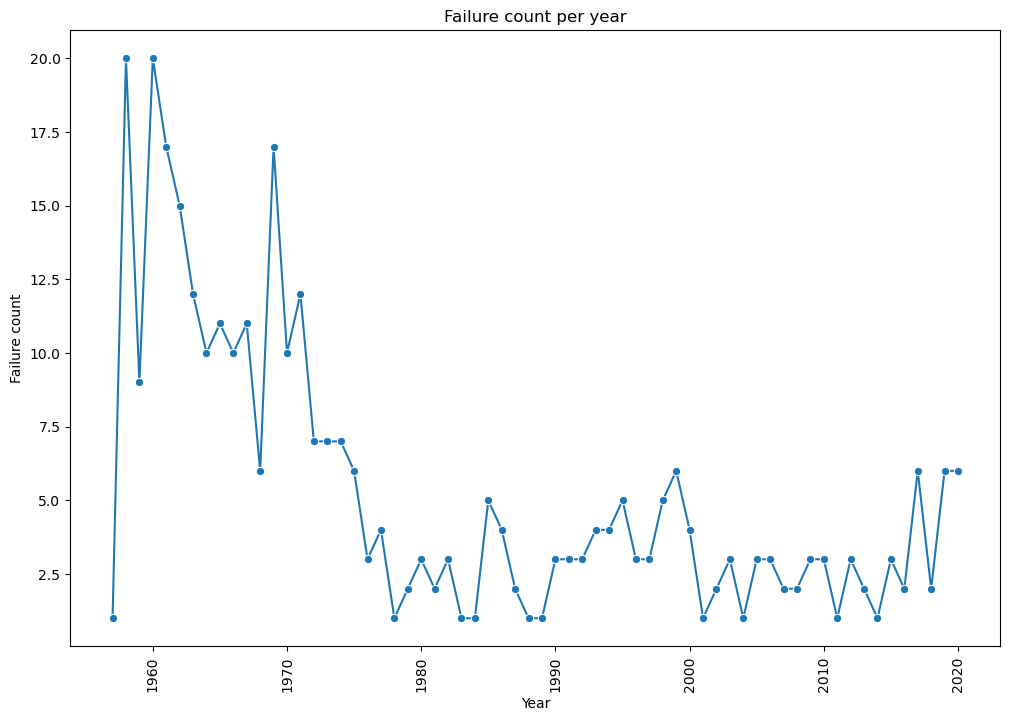

In [78]:
plt.figure(figsize=(12, 8))
# line plot
sns.lineplot(x='Year', y='Failure count', data=failure_data_per_year, marker='o')
# title and labels
plt.title('Failure count per year')
plt.xlabel('Year')
plt.ylabel('Failure count')
plt.xticks(rotation=90)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [79]:
percent_failure = failure_data_per_year["Failure count"] / launch_per_year["Launch count"] * 100

In [80]:
# add column year
percent_failure_df = pd.DataFrame({"Year": failure_data_per_year["Year"], "Percent failure": percent_failure})
percent_failure_df

Year  Percent failure
0   1957            33.33
1   1958            71.43
2   1959            45.00
3   1960            51.28
4   1961            32.69
..   ...              ...
59  2016             2.22
60  2017             6.52
61  2018             1.71
62  2019             5.50
63  2020             9.52

[64 rows x 2 columns]

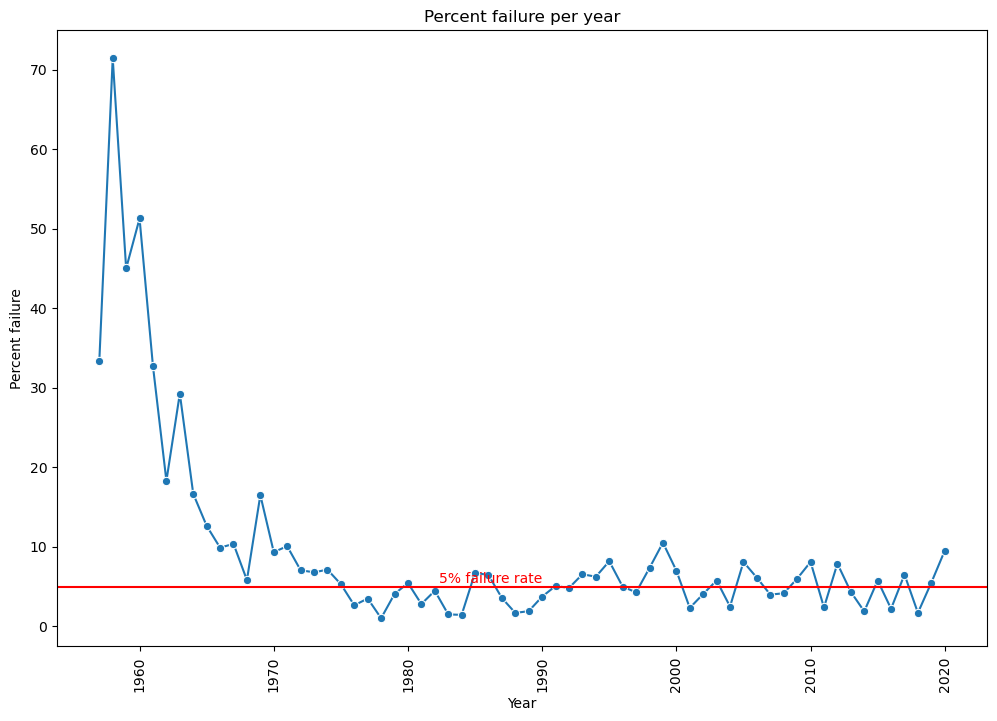

In [81]:
plt.figure(figsize=(12, 8))
# line plot
sns.lineplot(x='Year', y='Percent failure', data=percent_failure_df, marker='o')
# title and labels
plt.title('Percent failure per year')
plt.xlabel('Year')
plt.ylabel('Percent failure')
plt.xticks(rotation=90)
# horizontal line at 5%
plt.axhline(y=5, color='r', linestyle='-')
# label for horizontal line
plt.text(1990, 5.5, '5% failure rate', color = 'red', fontsize = 10, horizontalalignment='right')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [82]:
test_df = df_data

In [83]:
# adding a columns value == 1 for each launch
test_df["Launch"] = 1

In [84]:
grouped_df = test_df.groupby(['Year', 'Country']).sum().reset_index()
grouped_df

Year Country                                       Organisation  \
0    1957     KAZ                                 RVSN USSRRVSN USSR   
1    1957     USA                                            US Navy   
2    1958     KAZ      RVSN USSRRVSN USSRRVSN USSRRVSN USSRRVSN USSR   
3    1958     USA  US Air ForceAMBANASAAMBANASAUS NavyUS NavyUS N...   
4    1959     KAZ               RVSN USSRRVSN USSRRVSN USSRRVSN USSR   
..    ...     ...                                                ...   
422  2020     JPN                                         JAXAMHIMHI   
423  2020     KAZ  RoscosmosRoscosmosRoscosmosRoscosmosArianespac...   
424  2020     NZL                     Rocket LabRocket LabRocket Lab   
425  2020     RUS                                 VKS RFVKS RFVKS RF   
426  2020     USA  SpaceXSpaceXULASpaceXNorthropSpaceXSpaceXSpace...   

                                              Location  \
0    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
1             LC-18A, Cape Canaveral AFS, Florida, USA   
2    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
3    LC-11, Cape Canaveral AFS, Florida, USALC-5, C...   
4    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
..                                                 ...   
422  LA-Y1, Tanegashima Space Center, JapanLA-Y2, T...   
423  Site 200/39, Baikonur Cosmodrome, KazakhstanSi...   
424  Rocket Lab LC-1A, M?hia Peninsula, New Zealan...   
425  Site 43/4, Plesetsk Cosmodrome, RussiaSite 43/...   
426  LC-39A, Kennedy Space Center, Florida, USAPad ...   

                                                  Date  \
0    Sun Nov 03, 1957 02:30 UTCFri Oct 04, 1957 19:...   
1                           Fri Dec 06, 1957 16:44 UTC   
2    Thu Dec 04, 1958 18:18 UTCSat Oct 11, 1958 21:...   
3    Thu Dec 18, 1958 23:02 UTCSat Dec 06, 1958 05:...   
4    Sun Oct 04, 1959 00:43 UTCSat Sep 12, 1959 06:...   
..                                                 ...   
422  Sun Jul 19, 2020 21:58 UTCWed May 20, 2020 17:...   
423  Thu Jul 30, 2020 21:25 UTCThu Jul 23, 2020 14:...   
424  Sat Jul 04, 2020 21:19 UTCSat Jun 13, 2020 05:...   
425  Fri May 22, 2020 07:31 UTCMon Mar 16, 2020 18:...   
426  Fri Aug 07, 2020 05:12 UTCTue Aug 04, 2020 23:...   

                                                Detail  \
0    Sputnik 8K71PS | Sputnik-2Sputnik 8K71PS | Spu...   
1                              Vanguard | Vanguard TV3   
2    Vostok | E-1 n†­3 (Luna-1)Vostok | E-1 n†­2 (L...   
3    SM-65B Atlas | SCOREJuno II | Pioneer 3Thor-DM...   
4    Vostok | Luna-3Vostok | Luna-2Vostok | E-1A n†...   
..                                                 ...   
422  H-IIA 202 | Hope Mars MissionH-IIB | HTV-9H-II...   
423  Proton-M/Briz-M | Ekspress-80 & Ekspress-103So...   
424  Electron/Curie | Pics Or It Didn??¦t HappenEle...   
425  Soyuz 2.1b/Fregat-M | Cosmos 2546Soyuz 2.1b/Fr...   
426  Falcon 9 Block 5 | Starlink V1 L9 & BlackSkySt...   

                                         Rocket_Status    Price  \
0                           StatusRetiredStatusRetired     0.00   
1                                        StatusRetired     0.00   
2    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
3    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
4    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
..                                                 ...      ...   
422              StatusActiveStatusRetiredStatusActive   292.00   
423  StatusActiveStatusActiveStatusActiveStatusActi...   305.00   
424               StatusActiveStatusActiveStatusActive    21.00   
425               StatusActiveStatusActiveStatusActive    48.00   
426  StatusActiveStatusActiveStatusActiveStatusActi... 1,326.00   

                                        Mission_Status  \
0                                       SuccessSuccess   
1                                              Failure   
2                  FailureFailureFailureSuccessFailure   
3    Success

In [85]:
idx = grouped_df.groupby('Year')['Launch'].idxmax()
idx

Year
1957      0
1958      3
1959      5
1960      7
1961     10
       ... 
2016    391
2017    400
2018    401
2019    409
2020    418
Name: Launch, Length: 64, dtype: int64

In [86]:
result_df = grouped_df.loc[idx, ['Year', 'Country', 'Launch']]
result_df

Year Country  Launch
0    1957     KAZ       2
3    1958     USA      23
5    1959     USA      16
7    1960     USA      30
10   1961     USA      43
..    ...     ...     ...
391  2016     USA      27
400  2017     USA      30
401  2018     CHN      39
409  2019     CHN      34
418  2020     CHN      22

[64 rows x 3 columns]

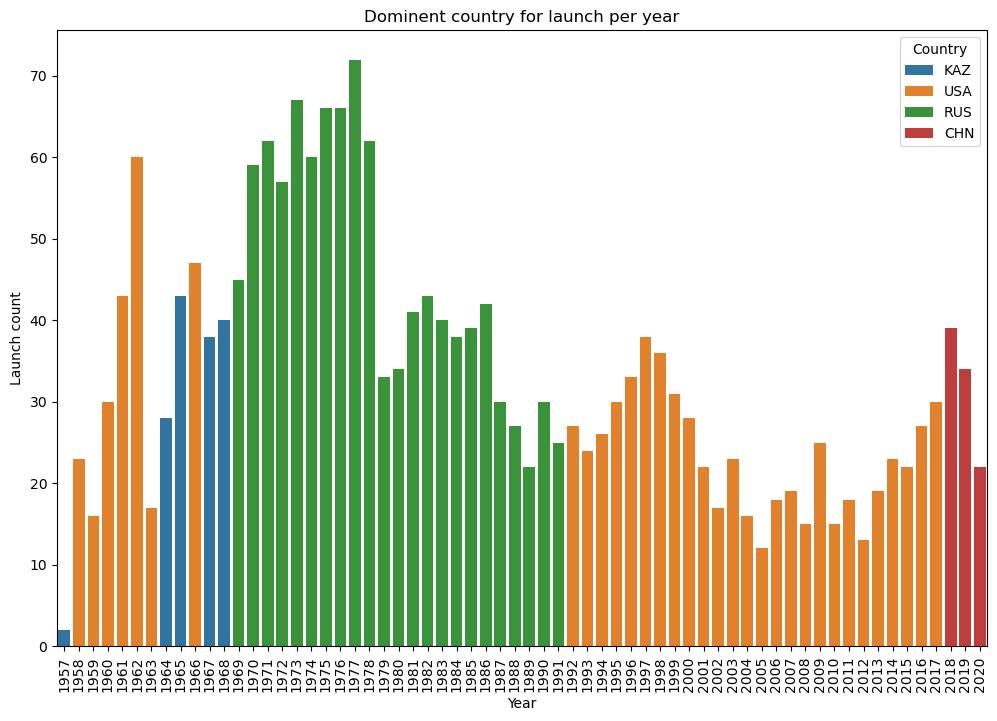

In [87]:
plt.figure(figsize=(12, 8))
# bar plot
sns.barplot(
    data=result_df,
    x="Year",
    y="Launch",
    hue="Country"
)
# title and labels
plt.title('Dominent country for launch per year')
plt.xlabel('Year')
plt.ylabel('Launch count')
plt.xticks(rotation=90)

plt.show()


### Analysis if launches are successful

In [88]:
test_df_success = df_data
test_df_success['Launch'] = np.where(test_df_success['Mission_Status'] != 'Success', 0, test_df_success['Launch'])
test_df_success["Launch"].unique()

array([1, 0], dtype=int64)

In [89]:
# changes datatype
test_df_success['Launch'] = np.where(test_df_success['Launch'] == '1', 1, test_df_success['Launch'])
test_df_success["Launch"].unique()


array([1, 0], dtype=int64)

In [90]:
grouped_data_success = test_df_success.groupby(['Year', 'Country']).sum().reset_index()
grouped_data_success

Year Country                                       Organisation  \
0    1957     KAZ                                 RVSN USSRRVSN USSR   
1    1957     USA                                            US Navy   
2    1958     KAZ      RVSN USSRRVSN USSRRVSN USSRRVSN USSRRVSN USSR   
3    1958     USA  US Air ForceAMBANASAAMBANASAUS NavyUS NavyUS N...   
4    1959     KAZ               RVSN USSRRVSN USSRRVSN USSRRVSN USSR   
..    ...     ...                                                ...   
422  2020     JPN                                         JAXAMHIMHI   
423  2020     KAZ  RoscosmosRoscosmosRoscosmosRoscosmosArianespac...   
424  2020     NZL                     Rocket LabRocket LabRocket Lab   
425  2020     RUS                                 VKS RFVKS RFVKS RF   
426  2020     USA  SpaceXSpaceXULASpaceXNorthropSpaceXSpaceXSpace...   

                                              Location  \
0    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
1             LC-18A, Cape Canaveral AFS, Florida, USA   
2    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
3    LC-11, Cape Canaveral AFS, Florida, USALC-5, C...   
4    Site 1/5, Baikonur Cosmodrome, KazakhstanSite ...   
..                                                 ...   
422  LA-Y1, Tanegashima Space Center, JapanLA-Y2, T...   
423  Site 200/39, Baikonur Cosmodrome, KazakhstanSi...   
424  Rocket Lab LC-1A, M?hia Peninsula, New Zealan...   
425  Site 43/4, Plesetsk Cosmodrome, RussiaSite 43/...   
426  LC-39A, Kennedy Space Center, Florida, USAPad ...   

                                                  Date  \
0    Sun Nov 03, 1957 02:30 UTCFri Oct 04, 1957 19:...   
1                           Fri Dec 06, 1957 16:44 UTC   
2    Thu Dec 04, 1958 18:18 UTCSat Oct 11, 1958 21:...   
3    Thu Dec 18, 1958 23:02 UTCSat Dec 06, 1958 05:...   
4    Sun Oct 04, 1959 00:43 UTCSat Sep 12, 1959 06:...   
..                                                 ...   
422  Sun Jul 19, 2020 21:58 UTCWed May 20, 2020 17:...   
423  Thu Jul 30, 2020 21:25 UTCThu Jul 23, 2020 14:...   
424  Sat Jul 04, 2020 21:19 UTCSat Jun 13, 2020 05:...   
425  Fri May 22, 2020 07:31 UTCMon Mar 16, 2020 18:...   
426  Fri Aug 07, 2020 05:12 UTCTue Aug 04, 2020 23:...   

                                                Detail  \
0    Sputnik 8K71PS | Sputnik-2Sputnik 8K71PS | Spu...   
1                              Vanguard | Vanguard TV3   
2    Vostok | E-1 n†­3 (Luna-1)Vostok | E-1 n†­2 (L...   
3    SM-65B Atlas | SCOREJuno II | Pioneer 3Thor-DM...   
4    Vostok | Luna-3Vostok | Luna-2Vostok | E-1A n†...   
..                                                 ...   
422  H-IIA 202 | Hope Mars MissionH-IIB | HTV-9H-II...   
423  Proton-M/Briz-M | Ekspress-80 & Ekspress-103So...   
424  Electron/Curie | Pics Or It Didn??¦t HappenEle...   
425  Soyuz 2.1b/Fregat-M | Cosmos 2546Soyuz 2.1b/Fr...   
426  Falcon 9 Block 5 | Starlink V1 L9 & BlackSkySt...   

                                         Rocket_Status    Price  \
0                           StatusRetiredStatusRetired     0.00   
1                                        StatusRetired     0.00   
2    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
3    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
4    StatusRetiredStatusRetiredStatusRetiredStatusR...     0.00   
..                                                 ...      ...   
422              StatusActiveStatusRetiredStatusActive   292.00   
423  StatusActiveStatusActiveStatusActiveStatusActi...   305.00   
424               StatusActiveStatusActiveStatusActive    21.00   
425               StatusActiveStatusActiveStatusActive    48.00   
426  StatusActiveStatusActiveStatusActiveStatusActi... 1,326.00   

                                        Mission_Status  \
0                                       SuccessSuccess   
1                                              Failure   
2                  FailureFailureFailureSuccessFailure   
3    Success

In [91]:
idx_success = grouped_data_success.groupby('Year')['Launch'].idxmax()
idx_success

Year
1957      0
1958      3
1959      5
1960      7
1961     10
       ... 
2016    391
2017    400
2018    401
2019    409
2020    426
Name: Launch, Length: 64, dtype: int64

In [92]:
result_df_success = grouped_data_success.loc[idx_success, ['Year', 'Country', 'Launch']]
result_df_success

Year Country  Launch
0    1957     KAZ       2
3    1958     USA       5
5    1959     USA       6
7    1960     USA      16
10   1961     USA      27
..    ...     ...     ...
391  2016     USA      26
400  2017     USA      30
401  2018     CHN      38
409  2019     CHN      32
426  2020     USA      20

[64 rows x 3 columns]

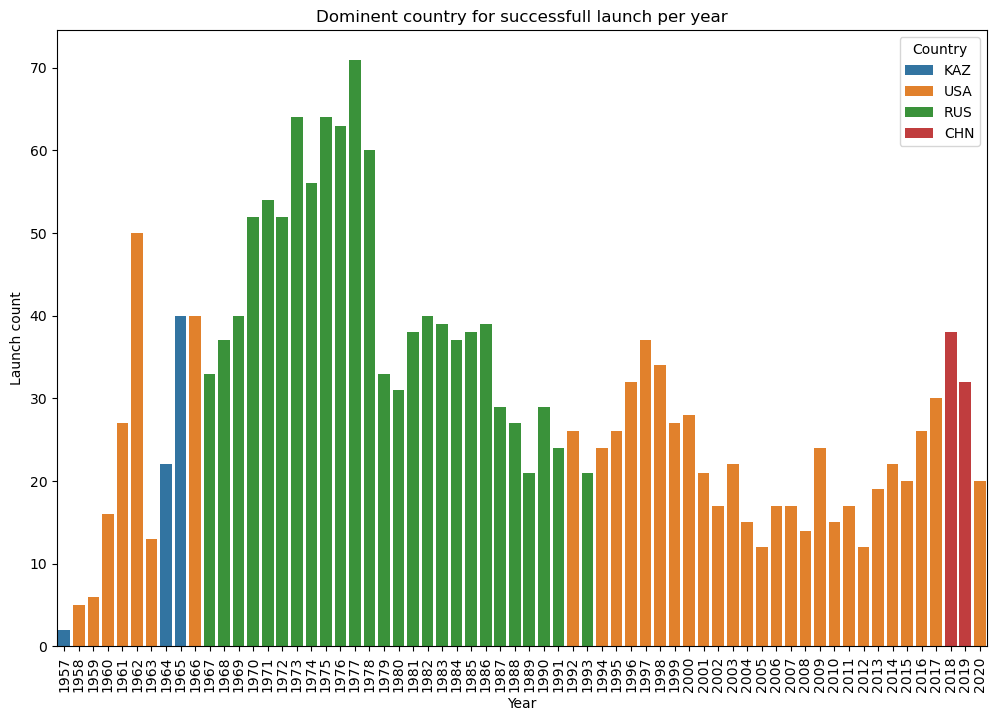

In [93]:
plt.figure(figsize=(12, 8))
# bar plot
sns.barplot(
    data=result_df_success,
    x="Year",
    y="Launch",
    hue="Country"
)
# title and labels
plt.title('Dominent country for successfull launch per year')
plt.xlabel('Year')
plt.ylabel('Launch count')
plt.xticks(rotation=90)

plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [94]:
df_org = df_data

In [95]:
grouped_data_org = df_org.groupby(['Year', 'Organisation']).sum().reset_index()
idx_org = grouped_data_org.groupby('Year')['Launch'].idxmax()
result_df_org = grouped_data_org.loc[idx_org, ['Year', 'Organisation', 'Launch']]

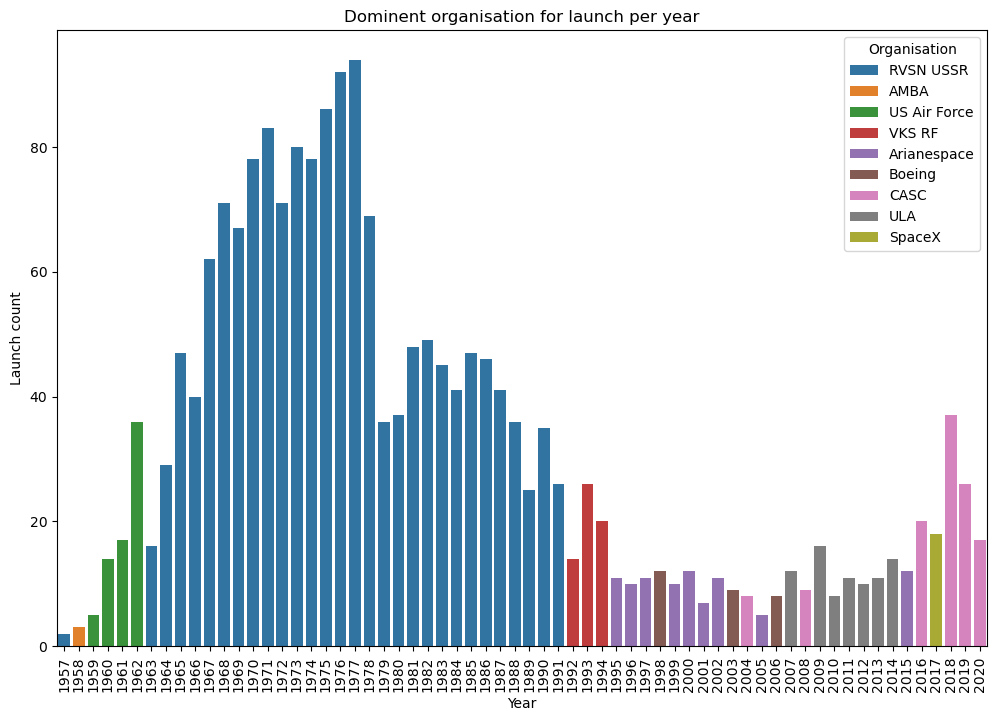

In [96]:
plt.figure(figsize=(12, 8))
# bar plot
sns.barplot(
    data=result_df_org,
    x="Year",
    y="Launch",
    hue="Organisation"
)
# title and labels
plt.title('Dominent organisation for launch per year')
plt.xlabel('Year')
plt.ylabel('Launch count')
plt.xticks(rotation=90)

plt.show()